In [5]:
%matplotlib inline

In [ ]:
## Import commands

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

In [ ]:
#How to read a csv

In [2]:
file=pd.read_csv("FL_insurance_sample.csv")

In [ ]:
#How to list the columns

In [ ]:
file.columns

In [ ]:
#Read a range of rows and certain columns

In [ ]:
file.loc[0:10,["policyID","statecode","county"]]

In [ ]:
#Read only specific rows

In [ ]:
file.loc[[0,10]] # in case of range of rows the , is replaced by :

In [ ]:
file.dtypes # will show data types for each column

In [ ]:
# Read a range of rows and sorted by A group of columns

In [ ]:
file.loc[0:5].sort_values(["eq_site_limit","policyID"],ascending=[False,False])

In [ ]:
file.head # to get first few records from the file

In [ ]:
h=file.head(5)  # to get the first few records from the file, please note this returns a datafrome
#when you provide a parameter in the paranthesis. If you do not provide a prarnathesis e.g. h=file.head then 
#it returns NOT a dataframe. If it is not a dataframe then you cannot run all the operations on the 
#output that you would typically run on a data frame

In [ ]:
t=file.tail() # to get the last few reords from the file

In [ ]:
file.tail(3) # to get the last few records from the file

In [ ]:
mp.graph(h,t)

In [ ]:
len(file) # find the number of recrods in the file here

In [ ]:
file # print the whole file here

In [ ]:
h["hu_site_limit"] > 0.0 # identify which recrods in the file pass certain criteria

In [ ]:
h[h["hu_site_limit"] > 0.0] # select a smaller subset of data based on some criteria

In [ ]:
h[(h["hu_site_limit"] > 0.0) & (h["eq_site_limit"] > 0.0)] # add condiitions

In [ ]:
h[(h["hu_site_limit"] > 0.0) | (h["eq_site_limit"] > 0.0)] # Use OR condition

In [ ]:
len(h[(h["hu_site_limit"] > 0.0) | (h["eq_site_limit"] > 0.0)]) # find the lenght of a new data frame

In [ ]:
h.columns

In [ ]:
h[(h["hu_site_limit"] > 0.0) | (h["eq_site_limit"] > 0.0)].sort_values(["hu_site_limit"]) 
# sort the output

In [ ]:
h["hu_site_limit"] # print

In [ ]:
h["hu_site_limit"].isnull() # check if certain column is null

In [ ]:
h["hu_site_limit"].notnull() # check if certain column is not nulll

In [ ]:
h[h["hu_site_limit"].notnull()] # select only those records from df which have certain column notfull

In [ ]:
h["construction"].str.startswith("W")  # identify which columns starts with some specific string

In [ ]:
h[h["construction"].str.startswith("W")] # select records where certrain columns has a string starting with certain chars

In [ ]:
h["construction"].str.endswith("d") # identify if certains fields ends in certain patterns

In [ ]:
h["construction"].str.contains("d") # identify if certains fields contains certain patterns

In [ ]:
h["construction"].value_counts()  # count the number of rows in a df for unique values, #
#results are sorted in the desc order of frequency

In [ ]:
h["fl_site_limit"].value_counts().sort_values(ascending=[False]) # user sort_values to sort by values
# instead of index

In [ ]:
h

In [ ]:
file.head()

In [ ]:
%%time
file[file["county"]=="CLAY COUNTY"]# %%time will tell u the time it took to run operation

In [ ]:
file_index=file.set_index("county") # create index, improve perfrmance
file_index

In [ ]:
%%time
file_index.loc["CLAY COUNTY"]# %%time will tell u the time it took to run operation, this is how you access records after creating
#an index on it, pls note the column on which the index was created is now in index. It is not in df

In [ ]:
c=file.set_index("county").sort_index() # this is how to sort filex on index, performance improves only after sorting file on index

In [ ]:
c.columns # after setting indexes if you check columns the column on which index was created is gone 

In [ ]:
%%time
c.loc["CLAY COUNTY"]

In [ ]:
d=file.set_index(["county","construction"]).sort_index() # how to set index on multiple columns
d.columns

In [ ]:
d=file.reset_index() # how to remove indexes
d.columns  # cloumns reappear in the list of columns

In [ ]:
d=file.reset_index(["county"]) # column mentioned here will dis-appear from index
d.columns

In [ ]:
%%time
d.loc["CLAY COUNTY","Masonry"] # access records after creating indexes on multiple columns

In [ ]:
%%time
d.loc["CLAY COUNTY"].loc["Masonry"] # another way  to access records after creating indexes on multiple columns

In [ ]:
d=file.reset_index() # how to remove index on certain column
#d.loc["CLAY COUNTY"]
#d.loc["Masonry"]

In [ ]:
d.groupby(["county","construction"]).size() # this will group by the coulmns given and give a count

In [ ]:
e=d.groupby(["county","construction"]).eq_site_limit.sum() # do max, min, mean, sum on any column "eq_site_limit" here by grouping by on 
#other columns this way

In [ ]:
f=e.unstack() # this will bring he second column in the group by to header and give you a new df
f

In [ ]:
f.head(5)

In [ ]:
g=f.unstack() # one more unstacking will bring the second columnback and take the first coulmn to the top, pls not unstacking an 
#unstack gives a series and not a df

In [ ]:
h=e.unstack("county") # you cna determine what do you want to unstack on
h["BAY COUNTY"] - h["CLAY COUNTY"] # this way you can do mathematical operations and get a series as a result

In [ ]:
file.columns

In [ ]:
#df.datefield.dt.year >> will give you year from the datefiled in the dataframe df

In [ ]:
#x=df1.merge(df2, lefton="lkey", righton="rkey", how="outer/inner/left/right" ) gives a new df by joining df1 and df2 using 
#df1.lleky from left df and df2.rkey on right df. how will tell what kind of join to do

In [3]:
file.columns

Index(['policyID', 'statecode', 'county', 'eq_site_limit', 'hu_site_limit',
       'fl_site_limit', 'fr_site_limit', 'tiv_2011', 'tiv_2012',
       'eq_site_deductible', 'hu_site_deductible', 'fl_site_deductible',
       'fr_site_deductible', 'point_latitude', 'point_longitude', 'line',
       'construction', 'point_granularity'],
      dtype='object')

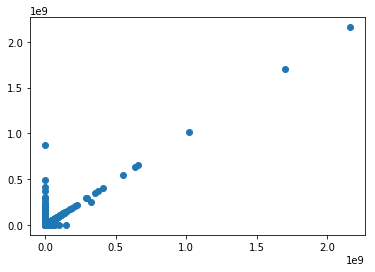

In [10]:
mp.scatter(file["fr_site_limit"],file["hu_site_limit"])